In [3]:
import tensorflow as tf
from tensorflow import keras

fmnist = tf.keras.datasets.fashion_mnist

In [4]:
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
training_images = training_images/255
test_images = test_images/255

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

In [11]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy")
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4954
Epoch 2/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3681
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3319
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3070
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2899


In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation="relu", input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [14]:
model.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [15]:
model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 73s 38ms/step - loss: 0.4581 - accuracy: 0.8334
Epoch 2/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.3061 - accuracy: 0.8874
Epoch 3/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.2622 - accuracy: 0.9044
Epoch 4/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.2340 - accuracy: 0.9126
Epoch 5/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.2086 - accuracy: 0.9215
Epoch 6/10
1875/1875 [==============================] - 68s 37ms/step - loss: 0.1887 - accuracy: 0.9291
Epoch 7/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.1692 - accuracy: 0.9364
Epoch 8/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.1529 - accuracy: 0.9427
Epoch 9/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.1366 - accuracy: 0.9488
Epoch 10/10
1875/1875 [==============================] - 76s 41m

In [16]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

1/1 [==============================] - 0s 35ms/step


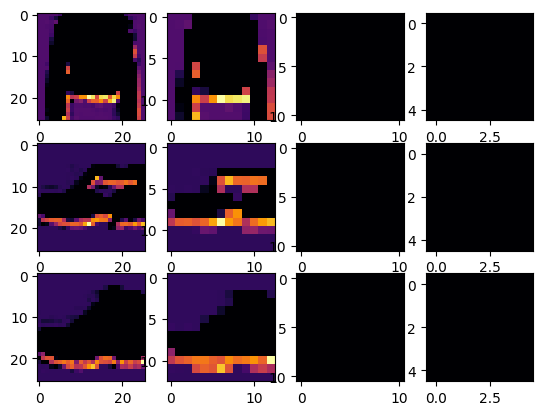

In [22]:
f,axarr = plt.subplots(3,4)

first_image, second_image, third_image = 10,23,28
convolution_number = 1

leyers_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = leyers_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[first_image].reshape(1,28,28,1))[x]
  axarr[0,x].imshow(f1[0, : , :, convolution_number], cmap = "inferno")
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[second_image].reshape(1,28,28,1))[x]
  axarr[1,x].imshow(f2[0, : , :, convolution_number], cmap = "inferno")
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[third_image].reshape(1,28,28,1))[x]
  axarr[2,x].imshow(f3[0, : , :, convolution_number], cmap = "inferno")
  axarr[2,x].grid(False)